In [21]:
!pip install -q tensorflow-gpu==2.0.0-beta1

import tensorflow as tf
print(tf.__version__)

1.14.0


In [22]:
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from math import pi

%matplotlib inline

In [23]:
df = pd.read_csv('GMR.csv')
df.style.format({'Fat_Liq': "{:5.2f}", 'MF': '{:+.2f}'})
df['Data'] = pd.to_datetime(df['Data'])
df.sort_values(by=['Data'], inplace=True)

In [24]:
df_062020 = df[df['Data']=='2020-06-01']

In [25]:
df_062020_2 = df_062020

In [26]:
df_062020.set_index(['SubFamilia'],inplace=True)
df_062020 = df_062020.pivot_table(values=['Fat_Liq','MF','UNP','SKU'],index=['SubFamilia'],columns=['NEG']).stack(0).fillna(0)

In [27]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "8pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "8pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '400px'),
                        ('font-size', '8pt')])
]

In [28]:
cmap = cmap=sns.diverging_palette(5, 150, as_cmap=True)

fig = plt.figure(figsize=(10,10))

df_062020.style.background_gradient(cmap, axis=1)\
         .set_properties(**{'max-width': '300px', 'font-size': '1pt'})\
         .set_caption("GMR")\
         .set_precision(2)\
         .set_table_styles(magnify())

fig.savefig('GMR.svg', format='svg', dpi=1200)

#html = df_062020.to_html();

 

# Print the HTML

#print(html);

<Figure size 720x720 with 0 Axes>

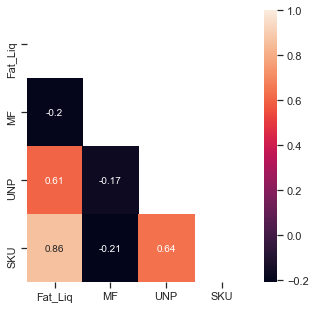

In [29]:
fig = plt.figure(figsize=(5,5))
mask = np.zeros((4,4))
mask[np.triu_indices_from(mask)] = True
mask

corr_historica = sns.heatmap(df.corr(),
                             mask=mask,
                             annot=True)
fig.savefig('corr_historica.svg', format='svg', dpi=1200)

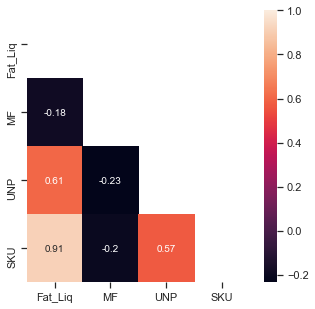

In [30]:
fig = plt.figure(figsize=(5,5))
mask = np.zeros((4,4))
mask[np.triu_indices_from(mask)] = True
mask

corr_atual = sns.heatmap(df_062020_2.corr(),
                             mask=mask,
                             annot=True)
fig.savefig('corr_atual.svg', format='svg', dpi=1200)

In [31]:
df.head()

,Data,SubFamilia,Fat_Liq,MF,UNP,SKU,NEG
189,2018-01-01,MOLAS,669635.66,0.3497,10764,24,N03
168,2018-01-01,FECHADURAS PARTES E PEÇAS,112022.89,0.2243,36455,54,NCN
167,2018-01-01,FECHADURAS PARTES E PEÇAS,862736.35,0.0953,301691,120,N14
166,2018-01-01,FECHADURAS PARTES E PEÇAS,368904.21,0.3183,72434,69,N03
165,2018-01-01,FECHADURAS MECÂNICAS,286052.16,0.2089,11774,7,NEX


In [32]:
df_9 = df.pivot_table(values=['UNP'],
                      index=['SubFamilia'],
                      columns=['NEG']
)

<Figure size 1440x1440 with 0 Axes>

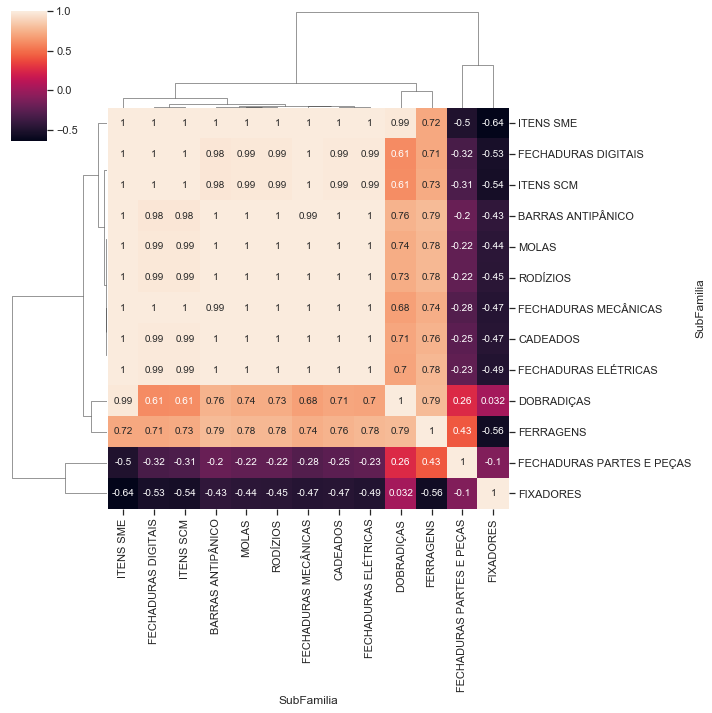

In [33]:
fig = plt.figure(figsize=(20,20))
clustermap = sns.clustermap(df_9.transpose().corr(), 
                             #mask = mask, 
                             annot=True)


clustermap.savefig('clustermap.svg', format='svg', dpi=1200)

In [34]:
df['MF'].describe()

count    1210.000000
mean        0.305344
std         0.120424
min        -0.365900
25%         0.241275
50%         0.312050
75%         0.379900
max         0.993500
Name: MF, dtype: float64

SubFamilia
BARRAS ANTIPÂNICO            [[AxesSubplot(0.125,0.834518;0.158163x0.045481...
CADEADOS                     [[AxesSubplot(0.125,0.834518;0.158163x0.045481...
DOBRADIÇAS                   [[AxesSubplot(0.125,0.834518;0.158163x0.045481...
FECHADURAS DIGITAIS          [[AxesSubplot(0.125,0.834518;0.158163x0.045481...
FECHADURAS ELÉTRICAS         [[AxesSubplot(0.125,0.834518;0.158163x0.045481...
FECHADURAS MECÂNICAS         [[AxesSubplot(0.125,0.834518;0.158163x0.045481...
FECHADURAS PARTES E PEÇAS    [[AxesSubplot(0.125,0.834518;0.158163x0.045481...
FERRAGENS                    [[AxesSubplot(0.125,0.834518;0.158163x0.045481...
FIXADORES                    [[AxesSubplot(0.125,0.834518;0.158163x0.045481...
ITENS SCM                    [[AxesSubplot(0.125,0.834518;0.158163x0.045481...
ITENS SME                    [[AxesSubplot(0.125,0.834518;0.158163x0.045481...
MOLAS                        [[AxesSubplot(0.125,0.834518;0.158163x0.045481...
RODÍZIOS                     [[AxesSubplo

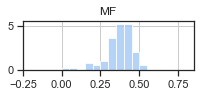

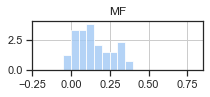

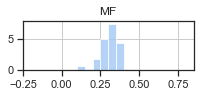

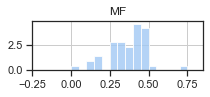

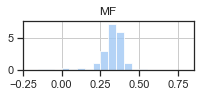

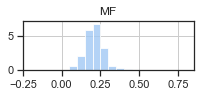

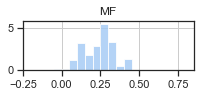

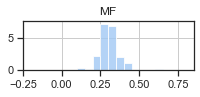

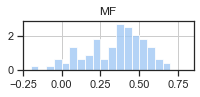

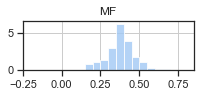

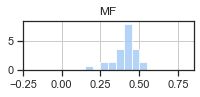

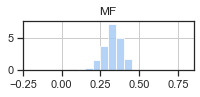

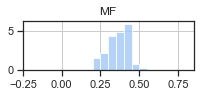

In [35]:
#fig = plt.subplots(figsize=(20,20))
df.groupby('SubFamilia').hist(column='MF', 
                              #by='MF', 
                              alpha = 0.8, 
                              sharex=True, 
                              sharey=False, 
                              figsize=(15,15), 
                              layout=(13,4),
                              range=((-0.2),.8),
                              density=True,
                              bins=20
                              #ax=ax
                                    
)

#df['MF'].plot(kind='kde',
#             linewidth=3,
#             xlim=(-0.2,.8))
#plt.legend(['KDE'])
#fig.savefig('histogramas.svg', format='svg', dpi=1200)

In [36]:
df_FM = df[df['SubFamilia']=='FECHADURAS MECÂNICAS']
df_FM

,Data,SubFamilia,Fat_Liq,MF,UNP,SKU,NEG
165,2018-01-01,FECHADURAS MECÂNICAS,286052.16,0.2089,11774,7,NEX
164,2018-01-01,FECHADURAS MECÂNICAS,270076.09,0.1498,20901,57,NCN
163,2018-01-01,FECHADURAS MECÂNICAS,262707.70,0.1765,18391,115,N14
162,2018-01-01,FECHADURAS MECÂNICAS,4156704.66,0.1903,275180,426,N03
125,2018-02-01,FECHADURAS MECÂNICAS,359410.77,0.2178,23323,112,N14
...,...,...,...,...,...,...,...
1106,2020-06-01,FECHADURAS MECÂNICAS,4534510.83,0.1967,254034,417,N03
1074,2020-07-01,FECHADURAS MECÂNICAS,142468.17,0.1859,8627,45,NCN
1075,2020-07-01,FECHADURAS MECÂNICAS,42237.67,0.3929,1728,3,NEX
1073,2020-07-01,FECHADURAS MECÂNICAS,106725.56,0.2326,6155,54,N14


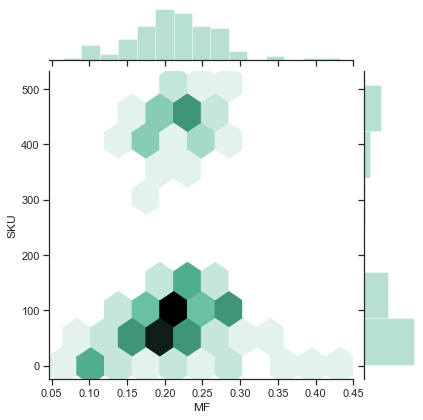

In [37]:
sns.set(style="ticks")

sns.jointplot(df_FM['MF'], df_FM['SKU'], kind="hex", color="#4CB391")

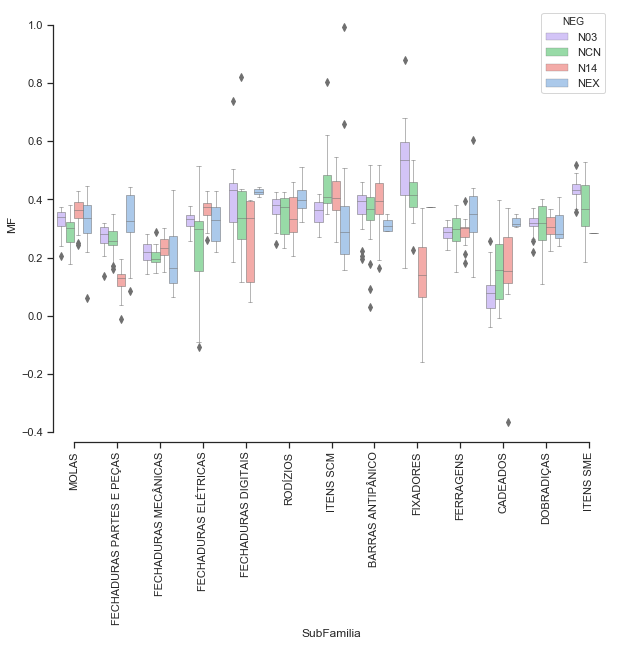

In [56]:
sns.set(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
fig = plt.figure(figsize=(10,8))
sns.boxplot(x="SubFamilia",
            y="MF", 
            #kind="box",
            hue="NEG",
            palette=["m", "g",'r','b'],
            data=df,
            #height=4, 
            #aspect=.7, 
            linewidth=0.5            
)
plt.xticks(rotation=90)

sns.despine(trim=True)

fig.savefig('boxplot12.svg', format='svg', dpi=1200)

<Figure size 14400x10800 with 0 Axes>

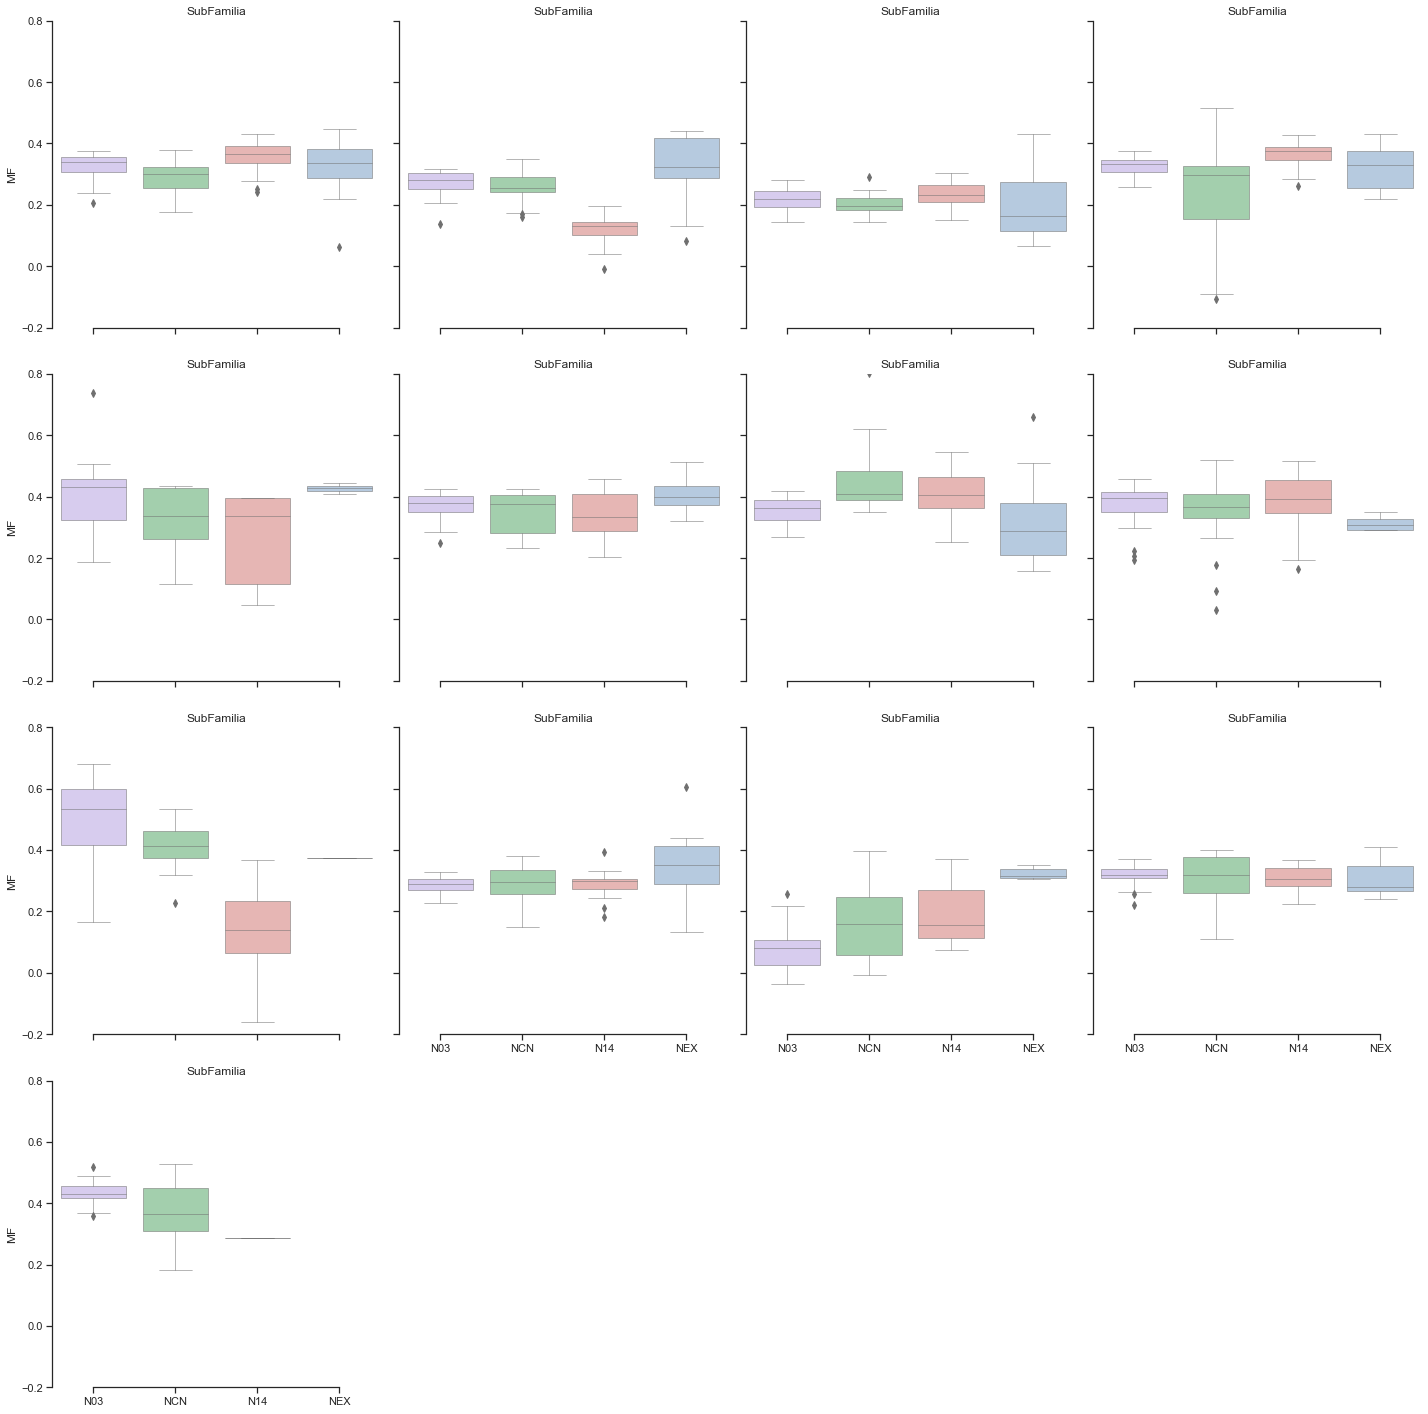

In [19]:
# Draw a nested boxplot to show bills by day and time
fig = plt.figure(figsize=(200,150))

fig = sns.catplot(col="SubFamilia",
            y="MF", 
            kind="box",
            x="NEG",
            palette=["m", "g",'r','b'],
            data=df,
            aspect=1, 
            linewidth=.5,
            margin_titles=True,
            col_wrap=4,
            ci = None,
            saturation=.5,
            estimator=np.median
            )

(fig.set_axis_labels("", "MF")
# .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_var}")
  .set(ylim=(-0.2, .8))
  .despine(left=True))  


sns.despine(trim=True)

fig.savefig('boxplots2.svg', format='svg', dpi=1200)

In [20]:
df = pd.read_csv('GMR.csv')
df['Data'] = pd.to_datetime(df['Data'])
df.sort_values(by=['Data'], inplace=True)
df.set_index(['SubFamilia'],inplace=True)
df = df.pivot_table(values=['Fat_Liq','MF','UNP','SKU'],index=['SubFamilia']).fillna(0)
df = df.reset_index()
Subs = df['SubFamilia']
df

,SubFamilia,Fat_Liq,MF,SKU,UNP
0,BARRAS ANTIPÂNICO,3.725432e+04,0.368579,3.936170,210.680851
1,CADEADOS,7.801833e+04,0.140757,14.151899,11469.189873
2,DOBRADIÇAS,1.181573e+05,0.306760,23.386792,67250.415094
3,FECHADURAS DIGITAIS,1.886881e+04,0.374711,3.333333,50.577778
4,FECHADURAS ELÉTRICAS,5.500050e+04,0.315739,9.764151,719.905660
5,FECHADURAS MECÂNICAS,1.763829e+06,0.212054,163.196721,111624.286885
6,FECHADURAS PARTES E PEÇAS,5.172286e+05,0.242491,77.791667,150356.283333
7,FERRAGENS,9.736305e+04,0.303059,48.341667,47558.966667
8,FIXADORES,9.135308e+03,0.346134,4.179775,134205.775281
9,ITENS SCM,1.053785e+05,0.385579,60.043478,67384.634783


In [101]:
from sklearn import preprocessing
df.set_index(['SubFamilia'],inplace=True)
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df = df.join(Subs)

df = df.rename(columns={0: "Fat_Liq", 1: "MF", 2:"SKU",3:"UNP"})
df.set_index(['SubFamilia'],inplace=True)
df = df.reset_index()
df

,SubFamilia,Fat_Liq,MF,SKU,UNP
0,BARRAS ANTIPÂNICO,0.016285,0.845697,0.003771,0.001065
1,CADEADOS,0.039510,0.000000,0.067674,0.075969
2,DOBRADIÇAS,0.062379,0.616221,0.125441,0.447088
3,FECHADURAS DIGITAIS,0.005810,0.868461,0.000000,0.000000
4,FECHADURAS ELÉTRICAS,0.026396,0.649549,0.040227,0.004453
5,FECHADURAS MECÂNICAS,1.000000,0.264662,1.000000,0.742312
6,FECHADURAS PARTES E PEÇAS,0.289750,0.377646,0.465762,1.000000
7,FERRAGENS,0.050532,0.602482,0.281542,0.316078
8,FIXADORES,0.000264,0.762379,0.005295,0.892549
9,ITENS SCM,0.055099,0.908804,0.354741,0.447981


In [22]:
def make_spider( row, title, color):
 
    # number of variable
    categories=list(df)[1:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(5,3,row+1, polar=True, )
    
    plt.subplots_adjust(left = 0.125,  # the left side of the subplots of the figure
                     right = 0.5,   # the right side of the subplots of the figure
                     bottom = 0.1,  # the bottom of the subplots of the figure
                     top = .8,     # the top of the subplots of the figure
                     wspace = .5,  # the amount of width reserved for space between subplots,
                     hspace = 0.55  # the amount of height reserved for space between subplots,
                    )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([.2,.4,.6,.8], ["0.2","0.4","0.6","0.8"], color="grey", size=7)
    plt.ylim(0,1)
    
    # Ind1
    values=df.loc[row].drop('SubFamilia').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=.5, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    plt.title(title, size=10, color=color, y=1.2)

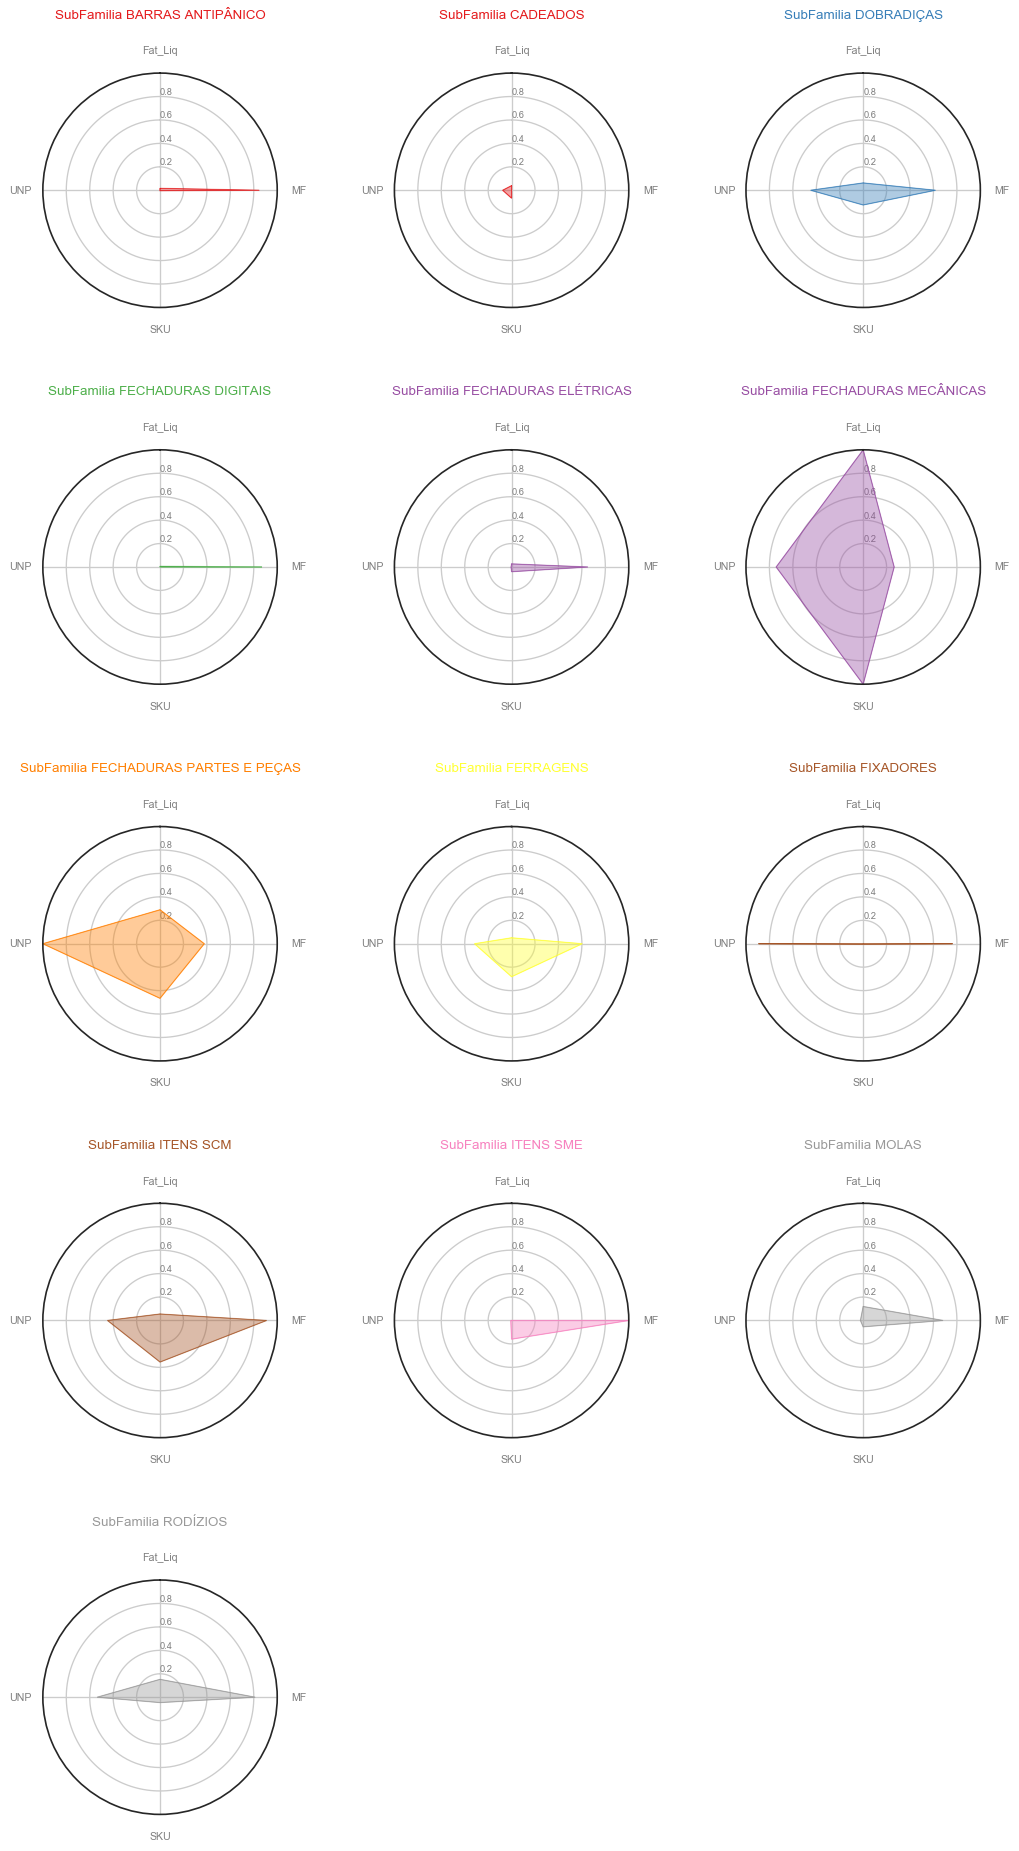

In [23]:
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
fig = plt.figure(figsize=(2500/my_dpi, 2500/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set1", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='SubFamilia '+df['SubFamilia'][row], color=my_palette(row))
    
fig.savefig('full_figure.svg', format='svg', dpi=1200)

In [24]:
df = pd.read_csv('GMR.csv')
df['Data'] = pd.to_datetime(df['Data'])
df.sort_values(by=['Data'], inplace=True)

df.set_index(['SubFamilia'],inplace=True)

df = df.pivot_table(values=['Fat_Liq','MF','UNP','SKU'],index=['SubFamilia']).fillna(0)

df = df.reset_index()

In [25]:
df.drop([3,4,5,6], axis=0, inplace=True)
Subs = df['SubFamilia']
Subs = Subs.reset_index()
Subs = Subs['SubFamilia']


In [26]:
df

,SubFamilia,Fat_Liq,MF,SKU,UNP
0,BARRAS ANTIPÂNICO,37254.321702,0.368579,3.936170,210.680851
1,CADEADOS,78018.334937,0.140757,14.151899,11469.189873
2,DOBRADIÇAS,118157.254245,0.306760,23.386792,67250.415094
7,FERRAGENS,97363.048667,0.303059,48.341667,47558.966667
8,FIXADORES,9135.308090,0.346134,4.179775,134205.775281
9,ITENS SCM,105378.520609,0.385579,60.043478,67384.634783
10,ITENS SME,8672.018214,0.410146,28.821429,1090.357143
11,MOLAS,217724.531786,0.324168,11.991071,3532.151786
12,RODÍZIOS,276086.093108,0.359164,10.662162,80593.756757


In [27]:
Subs

0    BARRAS ANTIPÂNICO
1             CADEADOS
2           DOBRADIÇAS
3            FERRAGENS
4            FIXADORES
5            ITENS SCM
6            ITENS SME
7                MOLAS
8             RODÍZIOS
Name: SubFamilia, dtype: object

In [28]:
from sklearn import preprocessing
df.set_index(['SubFamilia'],inplace=True)
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df = df.join(Subs)

df = df.rename(columns={0: "Fat_Liq", 1: "MF", 2:"SKU",3:"UNP"})
df.set_index(['SubFamilia'],inplace=True)
df = df.reset_index()

In [29]:
df

,SubFamilia,Fat_Liq,MF,SKU,UNP
0,BARRAS ANTIPÂNICO,0.106884,0.845697,0.000000,0.000000
1,CADEADOS,0.259322,0.000000,0.182075,0.084022
2,DOBRADIÇAS,0.409422,0.616221,0.346668,0.500315
3,FERRAGENS,0.331662,0.602482,0.791439,0.353358
4,FIXADORES,0.001732,0.762379,0.004342,1.000000
5,ITENS SCM,0.361636,0.908804,1.000000,0.501317
6,ITENS SME,0.000000,1.000000,0.443530,0.006565
7,MOLAS,0.781756,0.680839,0.143562,0.024788
8,RODÍZIOS,1.000000,0.810746,0.119877,0.599896


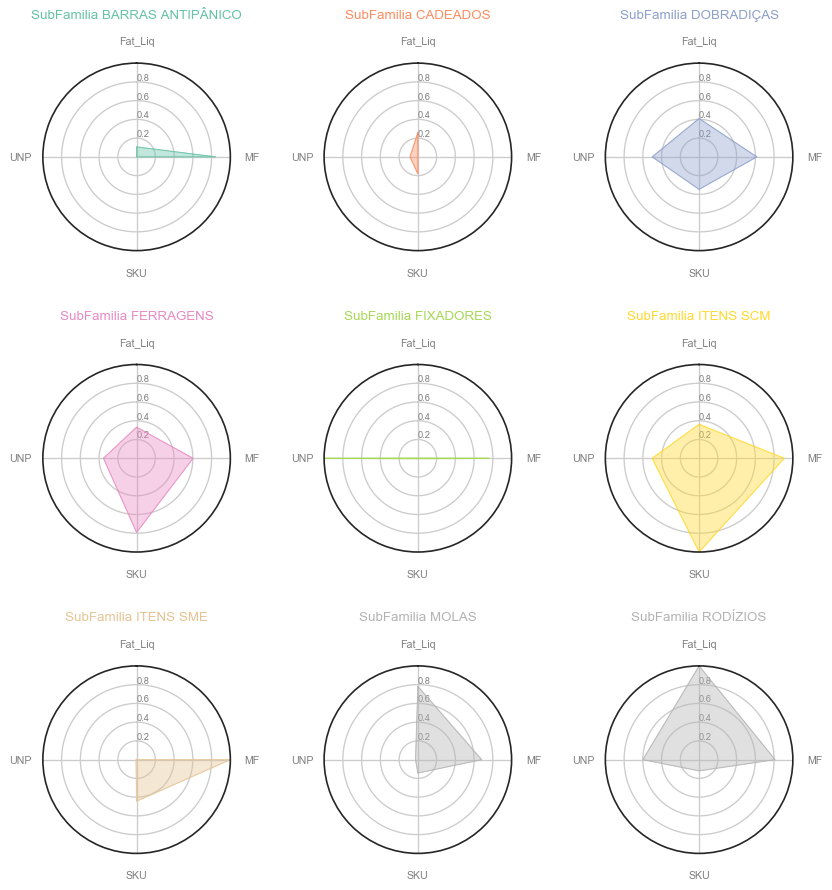

In [30]:
my_dpi=96
fig = plt.figure(figsize=(2000/my_dpi, 2000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='SubFamilia '+df['SubFamilia'][row], color=my_palette(row))
    
    
fig.savefig('outros.svg', format='svg', dpi=1200)